In [1]:
import tilelit as ti

In [2]:
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# # for the first time you'll need to run through this to resize:
# for fname in ['/home/ubuntu/case01-ER_resize_10.npy', 
#               '/home/ubuntu/case01-HER2_resize_10.npy',
#               '/home/ubuntu/case01-H&E_resize_10.npy']:
#     if not op.exists(fname):
#         resized = ti.tiff_resize(fname.split('_')[0] + '.tiff')
#         print(fname.split('_')[0] + '.tiff')
#         np.save(fname, resized)

# im_er = np.load('/home/ubuntu/case01-ER_resize_10.npy')
# im_her = np.load('/home/ubuntu/case01-HER2_resize_10.npy')
# im_he = np.load('/home/ubuntu/case01-H&E_resize_10.npy')



In [4]:
im_er = np.load('/home/ubuntu/im_er_resize_10.npy')
im_her = np.load('/home/ubuntu/im_her_resize_10.npy')
im_he = np.load('/home/ubuntu/im_he_resize_10.npy')

In [5]:
im_er.shape

(3008, 2340, 4)

In [6]:
im_he.shape

(2811, 2700, 4)

In [7]:
img_er_bw = im_er[..., 2] #np.sum(im_er, -1)
img_he_bw = im_he[..., 2] #np.sum(im_he, -1)

In [9]:
img_initial, aff_initial  = ti.initial_alignment(img_er_bw, img_he_bw)

In [10]:
img_final, aff_final = ti.fine_alignment(img_er_bw, img_he_bw, starting_affine=aff_initial)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


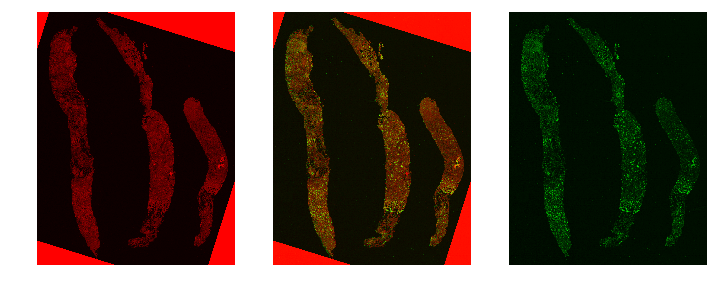

In [11]:
new_image1, new_image2 = ti.plot_together(1-(img_final/img_final.max()), 1-(img_er_bw/img_er_bw.max()))
#new_image1, new_image2 = plot_together(ax, img_final, img_er_bw)

In [12]:
aff_final

array([[   0.94912069,   -0.29666621,  231.43713181],
       [   0.30195627,    0.95456119, -138.89570469],
       [   0.        ,    0.        ,    1.        ]])

In [57]:
box_size = (100, 100)

In [67]:
y_center = round(np.random.rand() * (im_er.shape[0] - box_size[0]//2) + box_size[0] // 2)

In [68]:
x_center = round(np.random.rand() * (im_er.shape[1] - box_size[1]//2) + box_size[1] // 2)

In [69]:
x_coords, y_coords = np.meshgrid(np.arange(x_center - box_size[1] // 2, x_center + box_size[1] // 2),
                                 np.arange(y_center - box_size[0] // 2, y_center + box_size[0] // 2))

In [70]:
coords = np.array(list(zip(x_coords.ravel(), y_coords.ravel(), np.ones(np.product(box_size))))).astype(int)

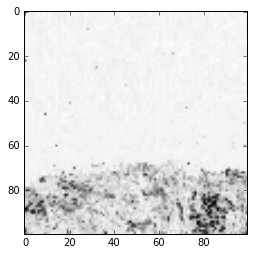

In [88]:
plt.imshow(im_er[(coords[:, 0], coords[:, 1])].reshape(box_size + (-1, ))[..., 2], cmap='gray')

In [89]:
trans_coords = (np.round(np.dot(aff_final, coords.T))).T.astype(int)

In [90]:
he_trans = im_he[(trans_coords[:, 0], trans_coords[:, 1])].reshape(box_size + (-1, ))

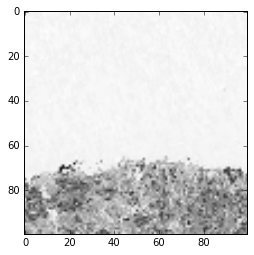

In [91]:
plt.imshow(he_trans[..., 2], cmap='gray')

(array([[ 0.93277251,  0.93333333,  0.92882862, ...,  0.92999526,
          0.9372549 ,  0.93783281],
        [ 0.93529412,  0.93137255,  0.9254902 , ...,  0.95686275,
          0.94351044,  0.95294118],
        [ 0.94509804,  0.93529412,  0.9372549 , ...,  0.93921569,
          0.95235768,  0.95294118],
        ..., 
        [ 0.59931606,  0.71092138,  0.71045996, ...,  0.29351811,
          0.33909536,  0.49902728],
        [ 0.52317367,  0.62109779,  0.62109779, ...,  0.55034842,
          0.36472995,  0.54914517],
        [ 0.48342959,  0.48535341,  0.6153396 , ...,  0.51715739,
          0.61359575,  0.47958615]]),
 array([[ 0.9372549 ,  0.9372549 ,  0.92941176, ...,  0.95294118,
          0.96078431,  0.95324625],
        [ 0.94117647,  0.95294118,  0.9372549 , ...,  0.95294118,
          0.96078431,  0.95294118],
        [ 0.94509804,  0.95294118,  0.93907749, ...,  0.95294118,
          0.95294118,  0.95294118],
        ..., 
        [ 0.39204931,  0.7627451 ,  0.76128103, ...,

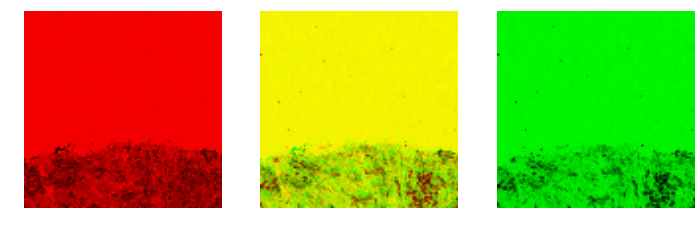

In [93]:
ti.plot_together(he_trans[..., 2], im_er[(coords[:, 0], coords[:, 1])].reshape(box_size + (-1, ))[..., 2])